In [13]:
import multiprocessing as mp # Para trabajar en paralelo

In [14]:
import random # Para generar num. aleatorios en la A y B 
import math
import time
import matplotlib.pyplot as pl
import os
import platform as pt

In [15]:
mc = mp.RawArray('i',10) # d = dobule, h = short, i = integer, b = byte, l = long

In [16]:
mc

In [17]:
def sec_mult(A, B): # f() que calcula la mult. en secuencial, como toda la vida se ha hecho 
    C = [[0] * n_col_B for i in range(n_fil_A)] # Crear y poblar la matrix  C = A*B
    for i in range(n_fil_A): # Hago la multiplicacion de AxB = C, i para iterar sobre las filas de A
        for j in range(n_col_B): # j para iterar sobre las columnas de B
            for k in range(n_col_A): # k para iterar en C
                C[i][j] += A[i][k] * B[k][j] # Aqui se hace la multiplicación y guardo en C.
    return C

In [18]:
def par_mult(A, B): # f() que prepara el reparto de trabajo para la mult. en paralelo
    n_cores = mp.cpu_count() # Obtengo los cores de mi pc
    size_col = math.ceil(n_col_B/n_cores) # Columnas  a procesar x c/cpre, ver Excel adjunto
    size_fil = math.ceil(n_fil_A/n_cores) # Filas a procesar x c/cpre, ver Excel adjunto
    MC = mp.RawArray('h', n_fil_A * n_col_B) # Array MC de memoria compartida donde se almacenaran los resultados, ver excel adjunto
    cores = [] # Array para guardar los cores y su trabajo
    for core in range(n_cores):# Asigno a cada core el trabajo que le toca, ver excel adjunto
        i_MC = min(core * size_fil, n_fil_A) # Calculo i para marcar inicio del trabajo del core en relacion a las filas
        f_MC = min((core + 1) * size_fil, n_fil_A) # Calculo f para marcar fin del trabajo del core, ver excel
        cores.append(mp.Process(target=par_core, args=(A, B, MC, i_MC, f_MC)))# Añado al Array los cores y su trabajo
    for core in cores:
        core.start()# Arranco y ejecuto el trabajo para c/ uno de los cores que tenga mi equipo, ver excel
    # for core in cores:
    #     core.join()# Bloqueo cualquier llamada hasta que terminen su trabajo todos los cores
    C_2D = [[0] * n_col_B for i in range(n_fil_A)] # Convierto el array unidimensional MC en una matrix 2D (C_2D) 
    for i in range(n_fil_A):# i para iterar sobre las filas de A
        for j in range(n_col_B):# j para iterar sobre las columnas de B
            C_2D[i][j] = MC[i*n_col_B + j] # Guardo el C_2D los datos del array MC
    return C_2D

In [19]:
def par_core(A, B, MC, i_MC, f_MC): # La tarea que hacen todos los cores
    for i in range(i_MC, f_MC): # Size representado en colores en el excel que itera sobre las filas en A
        for j in range(len(B[0])): # Size representado en colores en el excel que itera sobre las columnas en B
            for k in range(len(A[0])): # n_fil_B o lo que es l mismo el n_col_A
                MC[i*len(B[0]) + j] += A[i][k] * B[k][j]# Guarda resultado en MC[] de cada core

In [20]:
if __name__ == '__main__':
    A = [[random.randint(0,9) for i in range(100)] for j in range(100)] # Genero A[21535220][6]con num. aleatorios del 0 al 215, ver excel
    B = [[random.randint(0,9) for i in range(100)] for j in range(100)] # Genero B[6][21535220]con num. aleatorios del 0 al 215, ver excel
    n_fil_A = len(A) # Obtengo num de filas de A 
    n_col_A = len(A[0]) # Obtengo num de colunmas de A 
    n_fil_B = len(B) # Obtengo num de filas de B
    n_col_B = len(B[0]) # # Obtengo num de filas de B
    if n_col_A != n_fil_B: raise Exception('Dimensiones no validas') # Compruebo que se puedan multiplicar A y B
    inicioS = time.time()
    sec_mult(A, B) # Ejecuto multiplicacion secuencial
    finS = time.time()
    inicioP = time.time()
    par_mult(A, B) # Ejecuto multiplicacion paralela
    finP = time.time()
    print('\n\nMatriz  A y B se han multiplicado con exito en SECUENCIAL ha tardado ', finS-inicioS, ' y en PARALELO ', finP-inicioP)



Matriz  A y B se han multiplicado con exito en SECUENCIAL ha tardado  0.511549711227417  y en PARALELO  1.4345462322235107


In [ ]:
filasA = int(input("Cuantas filas quieres?"))
columnasA = int(input("Cuantas columnas quieres?"))
filasB = int(input("Cuantas filas quieres?"))
columnasB = int(input("Cuantas columnas quieres?"))

<BarContainer object of 2 artists>

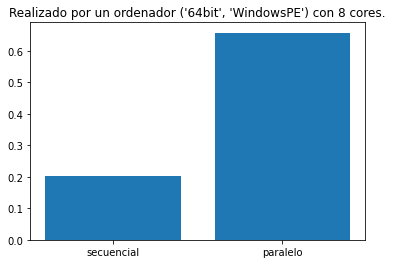

In [12]:
bar=['secuencial', 'paralelo']
datos=[finS-inicioS, finP-inicioP]

pl.title(str("Realizado por un ordenador ")+ str(pt.architecture())+" con "+ str(os.cpu_count())+ " cores.")

grafica= pl.bar(bar,datos)
grafica

In [11]:
pl.savefig('21938531')

<Figure size 432x288 with 0 Axes>

In [ ]:
if __name__ == '__main__':
     
        dominio = 301
        intervalo= 2
        datos_secuenciales = [0]*int(dominio/intervalo)
        datos_paralelos=[0]*int(dominio/intervalo)
        it = 0
        

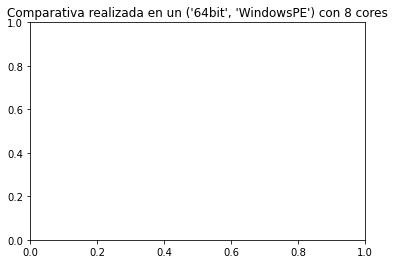

In [50]:
titulo = "Comparativa realizada en un " + str(pt.architecture()) + " con " + str(os.cpu_count()) + " cores"
pl.title(titulo)
pl.savefig('22056511')

In [ ]:
math.ceil(20/os.cpu_count()) ##esto me sirve por si me quedo 2,5 pues para llegar al siguiente numero superior --> 3